In [11]:
import os
import pandas as pd
import keypoint_moseq as kpms

In [12]:
PROJECT_DIR = "/mnt/d/Project/Keypoint-Moseq/20250913"
KEYPOINT_DATA = "/mnt/d/Project/Keypoint-Moseq/20250913"
BEST_MODEL = "my_models-0"
FPS = 50

In [13]:
config = lambda: kpms.load_config(PROJECT_DIR)

In [14]:
def interactive_group_setting_cli(project_dir=PROJECT_DIR, model_name=BEST_MODEL):
    index_filepath = os.path.join(project_dir, "index.csv")

    if not os.path.exists(index_filepath):
        kpms.generate_index(project_dir, model_name, index_filepath)

    summary_data = pd.read_csv(index_filepath, index_col=False)

    # Display current data
    print("\nCurrent group assignments:")
    print(summary_data[['name', 'group']].to_string(index=False))

    # Interactive editing loop
    print("\nEdit group assignments. Type 'quit' or 'q' to exit.")
    print("Format: enter the recording number and new group name, e.g., '5 mygroup'")
    print("Or just press Enter to assign 'default' as current group name.\n")

    while True:
        try:
            user_input = input("Edit [recording_idx] [new_group]: ").strip()
            if user_input.lower() in ('quit', 'q'):
                break

            parts = user_input.split(maxsplit=1)
            if len(parts) == 0:
                continue
            elif len(parts) == 1:
                idx_str = parts[0]
                new_group = ""
            else:
                idx_str, new_group = parts

            idx = int(idx_str)
            if idx < 0 or idx >= len(summary_data):
                print(f"Invalid index: {idx}. Must be between 0 and {len(summary_data)-1}")
                continue

            old_group = summary_data.loc[idx, 'group']
            summary_data.loc[idx, 'group'] = new_group.strip()
            print(f"Updated: {summary_data.loc[idx, 'name']} | '{old_group}' → '{new_group.strip()}'")

        except ValueError:
            print("Invalid input. Use format: <number> <group_name> (e.g., '3 wildtype')")
        except KeyboardInterrupt:
            print("\n\nInterrupted by user.")
            break

    # Save changes
    summary_data["group"] = summary_data["group"].str.strip()  # Clean whitespace
    summary_data.to_csv(index_filepath, index=False)
    print(f"\nSaved updated group assignments to {index_filepath}")

In [15]:
interactive_group_setting_cli(PROJECT_DIR, BEST_MODEL)


Current group assignments:
                                     name   group
SD-20250517-seg4_save_data_AVG0_instance0 default
     SD-20250517_save_data_AVG0_instance0 default
    SD-20250605B_save_data_AVG0_instance0 default
SD-20250620-toe1_save_data_AVG0_instance0 default
SD-20250620-toe3_save_data_AVG0_instance0 default
SD-20250620-toe4_save_data_AVG0_instance0 default

Edit group assignments. Type 'quit' or 'q' to exit.
Format: enter the recording number and new group name, e.g., '5 mygroup'
Or just press Enter to assign 'default' as current group name.

Updated: SD-20250620-toe3_save_data_AVG0_instance0 | 'default' → 'toe1'
Updated: SD-20250620-toe4_save_data_AVG0_instance0 | 'default' → 'toe3'
Invalid index: 6. Must be between 0 and 5
Updated: SD-20250620-toe1_save_data_AVG0_instance0 | 'default' → 'toe1'
Updated: SD-20250620-toe3_save_data_AVG0_instance0 | 'toe1' → 'toe3'
Updated: SD-20250620-toe3_save_data_AVG0_instance0 | 'toe3' → 'toe3'
Updated: SD-20250620-toe4_save_data_

In [16]:
moseq_df = kpms.compute_moseq_df(PROJECT_DIR, BEST_MODEL, smooth_heading=True)
stats_df = kpms.compute_stats_df(
    PROJECT_DIR,
    BEST_MODEL,
    moseq_df,
    min_frequency=0.005,  # threshold frequency for including a syllable in the dataframe
    groupby=["group", "name"],  # column(s) to group the dataframe by
    fps=FPS,
)  # frame rate of the video from which keypoints were inferred

# kpms.label_syllables(PROJECT_DIR, BEST_MODEL, moseq_df)

/home/bezver/anaconda3/envs/keypoint_moseq/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/bezver/anaconda3/envs/keypoint_moseq/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/bezver/anaconda3/envs/keypoint_moseq/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/bezver/anaconda3/envs/keypoint_moseq/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning:

When groupi

Saved figure to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-0/figures/frequency_stat_stats.png
Group(s): default, toe1, toe3, toe4


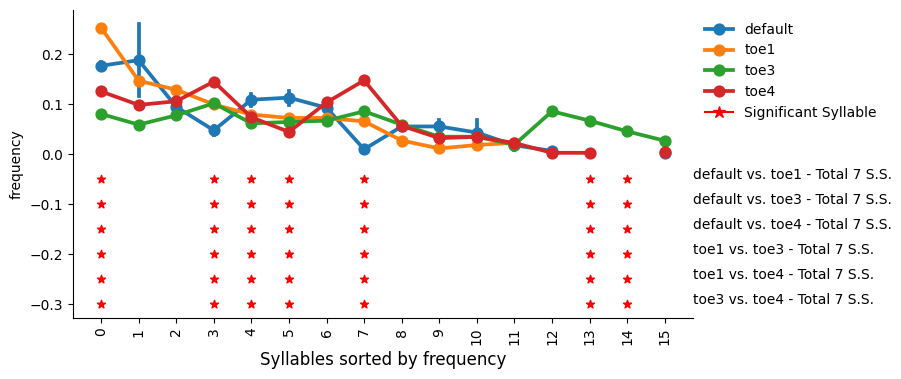

In [17]:
kpms.plot_syll_stats_with_sem(
    stats_df,
    PROJECT_DIR,
    BEST_MODEL,
    plot_sig=True,  # whether to mark statistical significance with a star
    thresh=0.05,  # significance threshold
    stat="frequency",  # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order="stat",  # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group="wt",  # name of the control group for statistical testing
    exp_group="HOM",  # name of the experimental group for statistical testing
    figsize=(8, 4),  # figure size
    groups=stats_df["group"].unique(),  # groups to be plotted
)

normalize = "bigram"  # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include = kpms.generate_transition_matrices(
    PROJECT_DIR,
    BEST_MODEL,
    normalize=normalize,
    min_frequency=0.005,  # minimum syllable frequency to include
)

Saved figure to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-0/figures/transition_matrices.png
Saved figure to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-0/figures/transition_graphs.png
Saved figure to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-0/figures/transition_graphs_diff.png


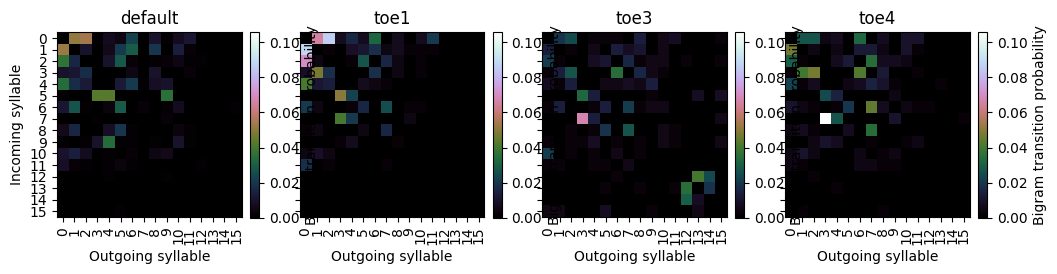

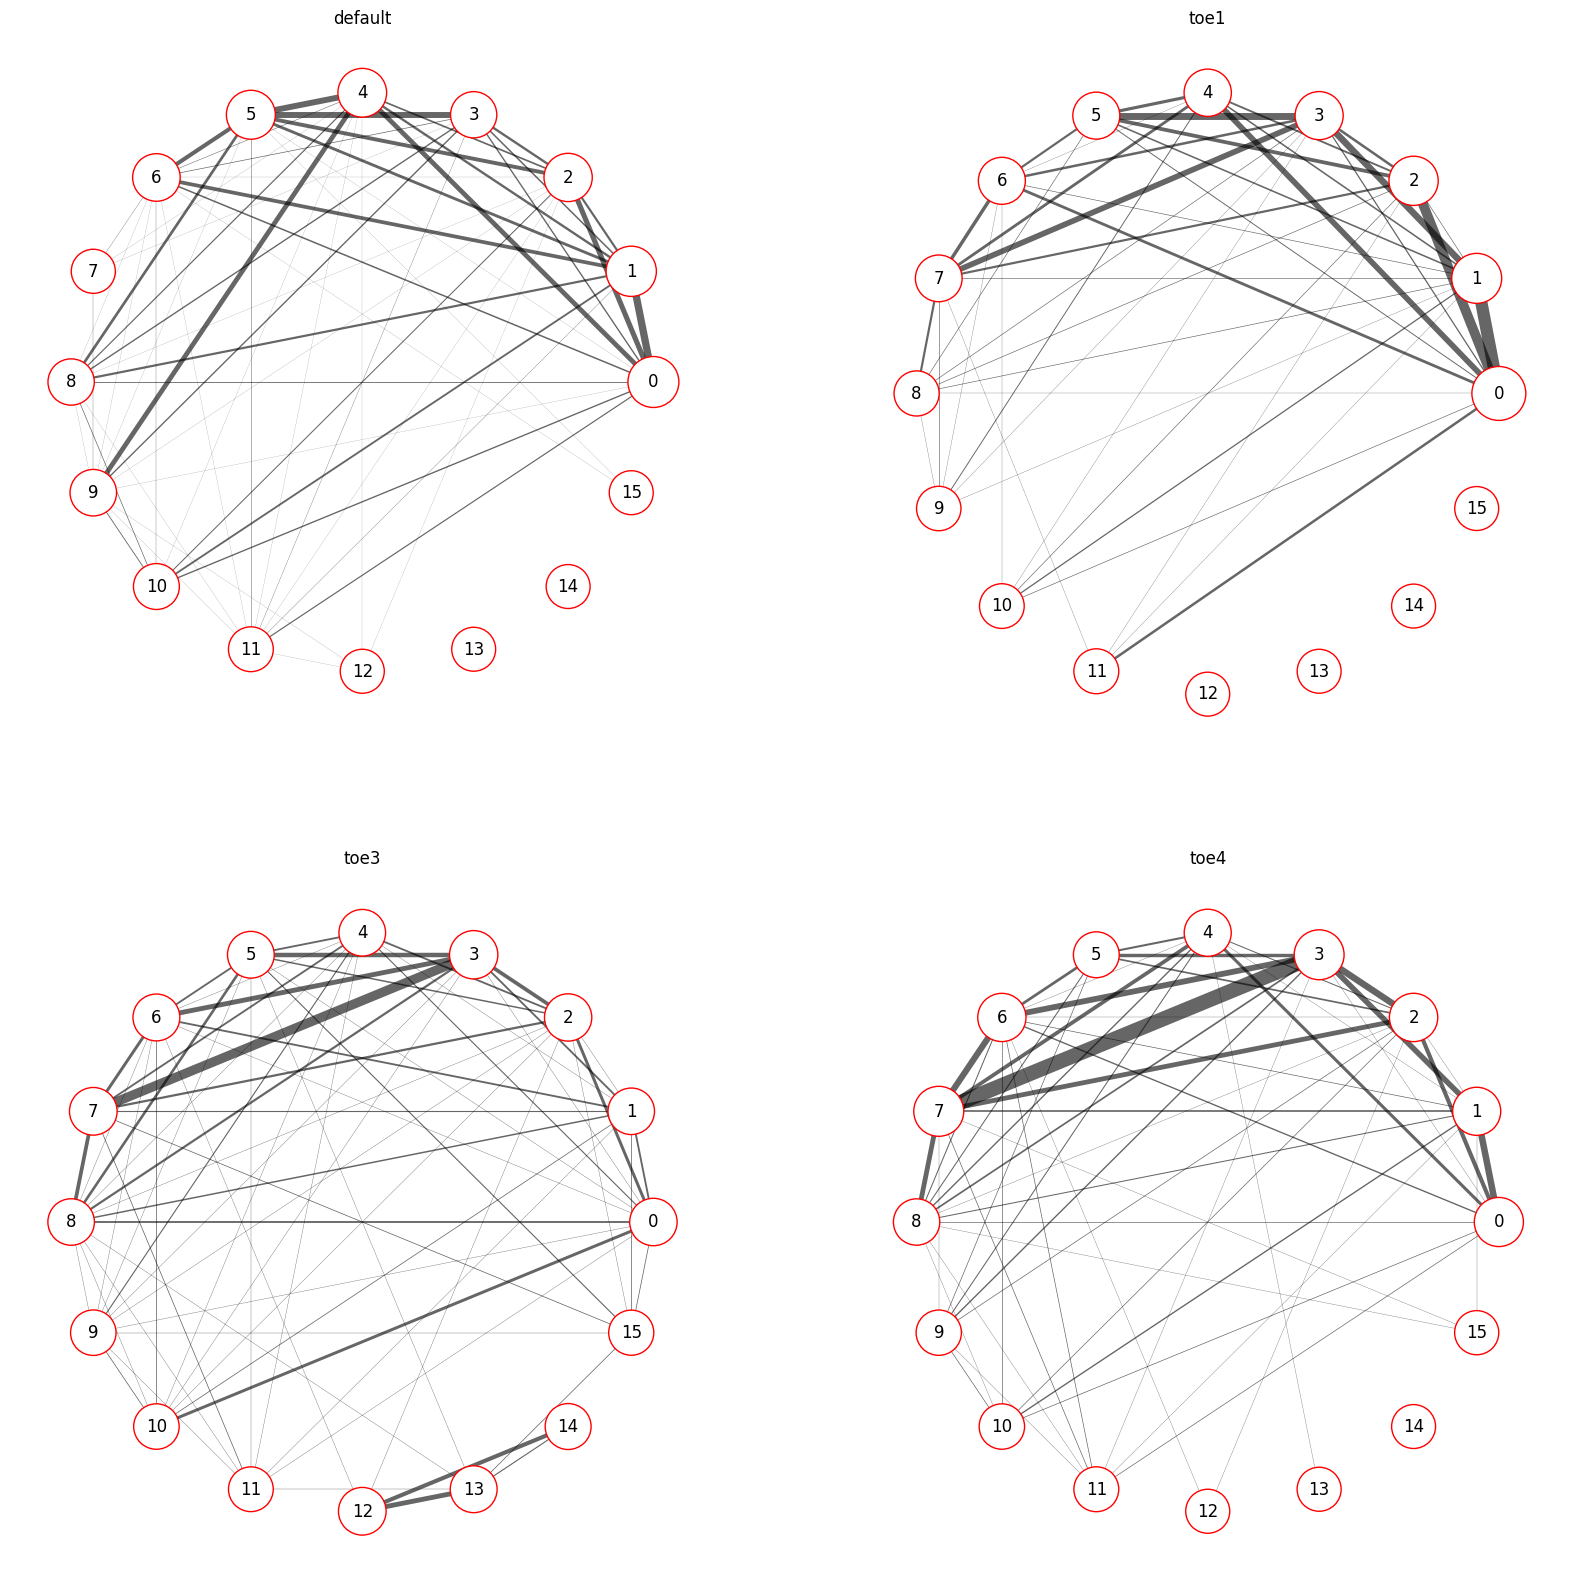

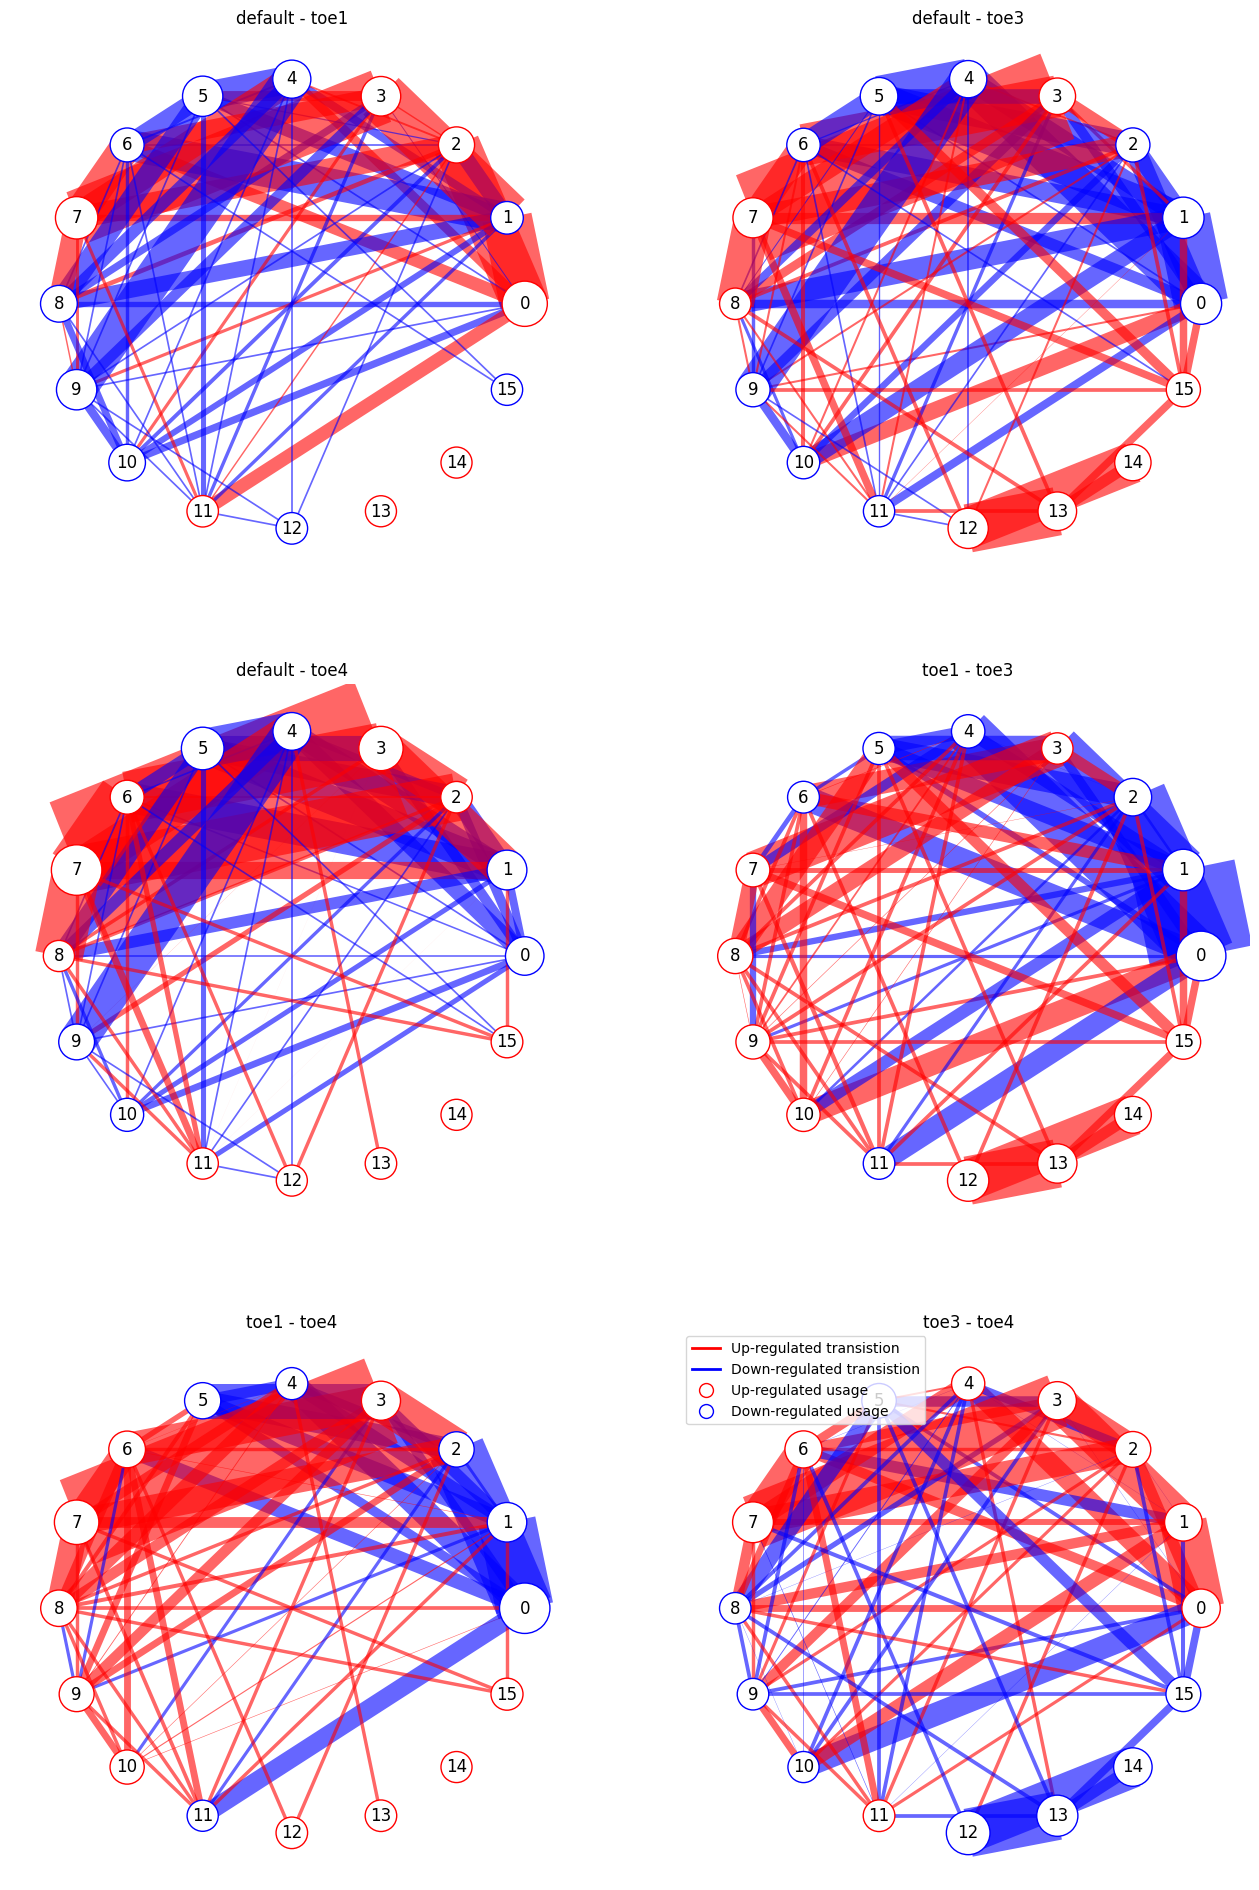

In [18]:

kpms.visualize_transition_bigram(
    PROJECT_DIR,
    BEST_MODEL,
    groups,
    trans_mats,
    syll_include,
    normalize=normalize,
    show_syllable_names=True,  # label syllables by index (False) or index and name (True)
)

# Generate a transition graph for each single group
kpms.plot_transition_graph_group(
    PROJECT_DIR,
    BEST_MODEL,
    groups,
    trans_mats,
    usages,
    syll_include,
    layout="circular",  # transition graph layout ("circular" or "spring")
    show_syllable_names=False,  # label syllables by index (False) or index and name (True)
)

# Generate a difference-graph for each pair of groups.
kpms.plot_transition_graph_difference(
    PROJECT_DIR, BEST_MODEL, groups, trans_mats, usages, syll_include, layout="circular"
)  # transition graph layout ("circular" or "spring")